# <font color='#000066'> Description of the GaitPhase Database PPMI</font>

## <font color='Red'> TODOLIST </font>

---

- Régler pb cohort = 3 voir a quoi correspondes 1/3 dans fichier

#### <font color='DarkGreen'>Decomposition of the different phase of walking</font>
<img src="image/phases_gait.jpg"/>

### First possibility :

---
**Data** : Sensoring and Application of Multimodal Data for the Detection of Freezing of Gait in Parkinson’s Disease

**Authors** : Wei Zhang, Debin Huang, Hantao Li, Lipeng Wang, Yanzhao Wei, Kang Pan, Lin Ma,Huanhuan Feng, Jing Pan, Yuzhu Guo

**Thesis** : https://arxiv.org/ftp/arxiv/papers/2110/2110.04444.pdf

---

<font color='red'>I WONT WORK ON IT</font>

Un nombre total de 12 patients atteints de la maladie de Parkinson ont participé aux expériences et ont produit des données valides d'une durée totale de 3 heures et 42 minutes. Les épisodes de FOG dans les données multimodales ont été étiquetés par deux médecins qualifiés. Les données multimodales peuvent être utilisées pour distinguer efficacement le FOG de la locomotion normale, et indiquent que les changements dans les signaux multimodaux de mouvement et électrophysiologiques pendant les épisodes de FOG pourraient être utilisés pour guider le traitement et le rétablissement des patients atteints de la MP.

*Pb : Manque de données et différent d'obj de prédiction d'un stage peu avancé de Parkinson*


---
### Second possibility PPMI :

---
**Data** : Motor features extracted from the raw accelerometer and gyroscope signals are presented in the tables below.
<img src = 'image/features.jpg'/>

**Authors** : Anat Mirelman, PhD, Tel Aviv Medcial Center, Tel Aviv University

**Data PPMI access** : https://ida.loni.usc.edu/pages/access/studyData.jsp?categoryId=3&subCategoryId=4

---
<font color='red'>I WILL WORK ON IT HERE</font>

Les données issues des évaluations de la marche dans chaque site sont enregistrées sur un ordinateur désigné sur le site et sont ensuite transférées dans une base de données centrale de la TASMC (Tel Aviv Sourasky Medical Center) pour être traitées. 

Une fois reçues, l'ingénieur de TASMC examine les données pour en vérifier la qualité et l'intégrité et les traite pour extraire les caractéristiques des signaux bruts de l'accéléromètre et du gyroscope à l'aide d'algorithmes validés. Les données sont ensuite vérifiées à nouveau pour s'assurer de leur qualité et de leur précision.

L'équipe du TASMC a travaillé avec le CTCC pour créer une légende de données et une infrastructure pour le transfert des données sur le site Web du PPMI (LONI) en tant que données en libre accès (voir le tableau ci-dessous). 

Tous les sujets conservent leur numéro d'identification unique PPMI, ce qui permet de combiner les données sur la démarche avec d'autres informations recueillies dans le cadre de PPMI.

---

## <font color = '#0000FF'> Data Cleaning</font> 

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [4]:
# import data for a first visualisation
data = pd.read_csv('Motor___MDS-UPDRS/Gait_Data___Arm_swing.csv')
data.head()

,PATNO,EVENT_ID,INFODT,COHORT,SP_U,RA_AMP_U,LA_AMP_U,RA_STD_U,LA_STD_U,SYM_U,...,TUG1_STRAIGHT_DUR,TUG1_TURNS_DUR,TUG1_STEP_REG,TUG1_STEP_SYM,TUG2_DUR,TUG2_STEP_NUM,TUG2_STRAIGHT_DUR,TUG2_TURNS_DUR,TUG2_STEP_REG,TUG2_STEP_SYM
0,42443,V06,11/2018,1.0,1.445,42.787289,31.405978,2.783204,2.597315,0.369588,...,0.554688,1.625000,0.612586,1.421568,10.390625,12.291016,0.546875,1.523438,0.565465,1.056312
1,42443,V04,11/2017,1.0,1.211,41.744432,42.194299,2.286481,2.235276,0.019062,...,0.507812,1.312500,0.605626,1.284985,9.437500,11.674805,0.523438,1.441406,0.744995,1.209420
2,42438,V06,10/2018,3.0,1.131,30.357805,42.788477,5.422287,5.012269,0.289054,...,0.593750,2.152344,0.741461,0.993754,13.781250,16.245117,0.554688,2.363281,0.713150,1.002639
3,42426,V06,12/2018,1.0,1.395,47.294965,34.610918,7.725009,7.838284,0.375873,...,0.632812,1.804688,0.575304,1.137755,8.820312,8.132812,0.593750,1.500000,0.548270,3.290938
4,42426,BL,11/2016,1.0,0.982,51.516231,30.989870,7.412588,4.762775,0.672047,...,0.632812,1.710938,0.509044,1.909214,8.609375,7.441406,0.640625,1.449219,0.667530,1.035053


### <font color='darkgreen'>MERGE CSV : FOCUS ON CLASSIFICATION PD AND HC</font>

In [5]:
# df_first = merge of all csv sheets from Analytic Datasets
file = 'Quick_Start/Consensus_Committee_Analytic_Datasets_28OCT21.xlsx'

df1 = pd.read_excel(file,'PD')
df2 = pd.read_excel(file, 'HC')
df3 = pd.read_excel(file, 'Prodromal')
df4 = pd.read_excel(file, 'SWEDD')

df = pd.concat([df1, df2, df3, df4])

df_first = df.sort_values(['PATNO'])
df_first = df_first.set_index('PATNO')

#df_arm file analyzed
file_arm = "Motor___MDS-UPDRS/Gait_Data___Arm_swing.csv"
df_arm = pd.read_csv(file_arm)


df_first.head(10)

,Cohort,Subgroup,ENRLPD,ENRLPROD,ENRLLRRK2,ENRLGBA,ENRLSNCA,Unnamed: 8,CONPD,CONPROD,...,Unnamed: 9,CONHPSM,CONRBD,PHENOCNV,DIAG1,DIAG1VIS,DIAG2,DIAG2VIS,ENRLSWEDD,CONSWEDD
PATNO,,,,,,,,,,,,,,,,,,,,,
3000,Healthy Control,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3001,Parkinson's Disease,Sporadic,1.0,0.0,0,0,0,NaN,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3002,Parkinson's Disease,Sporadic,1.0,0.0,0,0,0,NaN,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3003,Parkinson's Disease,Sporadic,1.0,0.0,0,0,0,NaN,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3004,Healthy Control,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3006,Parkinson's Disease,Sporadic,1.0,0.0,0,0,0,NaN,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3007,Parkinson's Disease,Sporadic,1.0,0.0,0,0,0,NaN,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3008,Healthy Control,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3009,Healthy Control,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Search
df_first.loc[40621,['Cohort','Subgroup','Comments']]

Cohort      Prodromal
Subgroup      Genetic
Comments          NaN
Name: 40621, dtype: object

In [7]:
# Display multiple table from stack overflow

from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2>{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)
    

---
#### Visualization of number in each cohort in total PPMI base

<ipython-input-8-384d47433d9e>:11: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax.pie(size, explode=explode, labels=names, autopct='%1.1f%%', startangle=90)


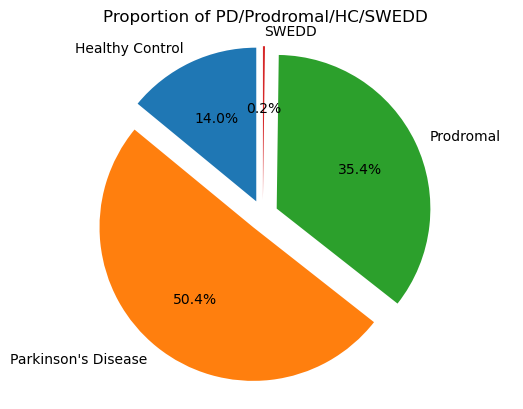

In [8]:
# Visualization of number in each cohort in total PPMI base
names = np.unique(df_first['Cohort'])
size = np.divide([np.count_nonzero(df_first['Cohort']=='Healthy Control'),
                  np.count_nonzero(df_first['Cohort'] == "Parkinson's Disease"),
                 np.count_nonzero(df_first['Cohort'] == "Prodromal"),
                 np.count_nonzero(df_first['Cohort'] == "SWEDD")], np.shape(df_first)[0])

# See pie chart
fig, ax = plt.subplots()
explode = (0.1, 0.1, 0.1, 0.1)
ax.pie(size, explode=explode, labels=names, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
ax.set_title('Proportion of PD/Prodromal/HC/SWEDD', color = 'Black')
plt.tight_layout
plt.show()


---
#### Nombre de Nan

In [9]:
columns = data.columns
print('Number of Nan values : \n', data[columns].isnull().sum())

Number of Nan values : 
 PATNO                 0
EVENT_ID             14
INFODT                0
COHORT               25
SP_U                 15
RA_AMP_U             13
LA_AMP_U             13
RA_STD_U             13
LA_STD_U             13
SYM_U                13
R_JERK_U             13
L_JERK_U             13
ASA_U                13
ASYM_IND_U           13
TRA_U                13
T_AMP_U              13
CAD_U                13
STR_T_U              13
STR_CV_U             13
STEP_REG_U           13
STEP_SYM_U           13
JERK_T_U             13
SP__DT               19
RA_AMP_DT            19
LA_AMP_DT            19
RA_STD_DT            19
LA_STD_DT            19
SYM_DT               19
R_JERK_DT            19
L_JERK_DT            19
ASA_DT               19
ASYM_IND_DT          19
TRA_DT               19
T_AMP_DT             19
CAD_DT               19
STR_T_DT             19
STR_CV_DT            19
STEP_REG_DT          19
STEP_SYM_DT          19
JERK_T_DT            19
SW_VEL_OP      

---
#### A quoi correpsondent n°1/3 de cohort dans fichier ?

In [10]:
# Visualization of number in cohort=1 in arm swing analyse base

# Filter
cohort_mask = (df_arm.COHORT==1)
col_mask = ['PATNO', 'COHORT']
df_armsort = df_arm.loc[cohort_mask,col_mask]

# Delete duplicates
#df_armsort.drop_duplicates(subset=['PATNO'], keep='first', inplace =True)

# Search corresponding cohort annotation
pat_mask = list(df_armsort.PATNO)
df_corresp = df_first.loc[pat_mask,['Cohort']]

In [11]:
# Visualization of number in cohort = 3 in arm swing analyse base

# Filter
cohort_mask = (df_arm.COHORT==3)
col_mask = ['PATNO', 'COHORT']
df_armsort3 = df_arm.loc[cohort_mask, col_mask]

# Delete duplicates
#df_armsort3.drop_duplicates(subset=['PATNO'], keep='first', inplace =True)

# Search corresponding cohort annotation
pat_mask = list(df_armsort3.PATNO)
for i in pat_mask:
    try:
        print(df_first.loc[i, ['Cohort']])
    except:
        print('Pas de numéro {} dans la base de donnée'.format(i))

# Error no number 42035?! even on the site not found
pat_mask.remove(42035)
df_corresp3 = df_first.loc[pat_mask, ['Cohort']]
df_armsort3 = df_armsort3.set_index('PATNO')

Cohort    Parkinson's Disease
Name: 42438, dtype: object
Cohort    Parkinson's Disease
Name: 42418, dtype: object
Cohort    Parkinson's Disease
Name: 42418, dtype: object
Cohort    Parkinson's Disease
Name: 42415, dtype: object
Cohort    Parkinson's Disease
Name: 42357, dtype: object
Cohort    Parkinson's Disease
Name: 42415, dtype: object
Cohort    Parkinson's Disease
Name: 42351, dtype: object
Cohort    Parkinson's Disease
Name: 42351, dtype: object
Cohort    Parkinson's Disease
Name: 42346, dtype: object
Cohort    Parkinson's Disease
Name: 42346, dtype: object
Cohort    Parkinson's Disease
Name: 42346, dtype: object
Cohort    Parkinson's Disease
Name: 42308, dtype: object
Cohort    Parkinson's Disease
Name: 42308, dtype: object
Cohort    Parkinson's Disease
Name: 42308, dtype: object
Cohort    Parkinson's Disease
Name: 41375, dtype: object
Cohort    Parkinson's Disease
Name: 41375, dtype: object
Cohort    Parkinson's Disease
Name: 41356, dtype: object
Cohort    Parkinson's Disease
N

In [12]:
# Display
print(df_armsort.shape, df_armsort3.shape)
display_side_by_side(df_armsort, df_corresp, df_armsort3, df_corresp3, titles=['Arm cohort1', 'Corresponding disease', 'Arm cohort3', 'Corresponding disease'])

(74, 2) (93, 1)


,PATNO,COHORT
0,42443,1.0
1,42443,1.0
3,42426,1.0
4,42426,1.0
5,42422,1.0
6,42422,1.0
12,42357,1.0
24,41364,1.0
25,41364,1.0
28,41343,1.0


---
#### <font color='DarkOrange'>Conclusion</font>

The **cohort 1** on the document corresponds to people in the **Prodromal stage** of Parkinson's disease (the stage at which individuals do not fulfill diagnostic criteria for PD ie, bradykinesia and at least 1 other motor sign)

The **cohort 3** to patients with **PD**

*PS : The exceptions of miss-classification are justified in the csv with a column named 'Comments'*

---

##### Attribution of Nan to the right cohort


In [13]:
# Get the PATNO of the unknown cohort
df_na_arm = df_arm.loc[df_arm['COHORT'].isna(),['PATNO']]
# Get their cohort
df_complete = df_first.loc[df_na_arm['PATNO'],['Cohort']].replace(['Prodromal',"Parkinson's Disease"],[1,3])
#Replace Nan in df_arm['COHORT']
df_arm.loc[df_arm.COHORT.isnull(), 'COHORT'] = list(df_complete['Cohort'])

df_arm.head(20)

,PATNO,EVENT_ID,INFODT,COHORT,SP_U,RA_AMP_U,LA_AMP_U,RA_STD_U,LA_STD_U,SYM_U,...,TUG1_STRAIGHT_DUR,TUG1_TURNS_DUR,TUG1_STEP_REG,TUG1_STEP_SYM,TUG2_DUR,TUG2_STEP_NUM,TUG2_STRAIGHT_DUR,TUG2_TURNS_DUR,TUG2_STEP_REG,TUG2_STEP_SYM
0,42443,V06,11/2018,1.0,1.445,42.787289,31.405978,2.783204,2.597315,0.369588,...,0.554688,1.625000,0.612586,1.421568,10.390625,12.291016,0.546875,1.523438,0.565465,1.056312
1,42443,V04,11/2017,1.0,1.211,41.744432,42.194299,2.286481,2.235276,0.019062,...,0.507812,1.312500,0.605626,1.284985,9.437500,11.674805,0.523438,1.441406,0.744995,1.209420
2,42438,V06,10/2018,3.0,1.131,30.357805,42.788477,5.422287,5.012269,0.289054,...,0.593750,2.152344,0.741461,0.993754,13.781250,16.245117,0.554688,2.363281,0.713150,1.002639
3,42426,V06,12/2018,1.0,1.395,47.294965,34.610918,7.725009,7.838284,0.375873,...,0.632812,1.804688,0.575304,1.137755,8.820312,8.132812,0.593750,1.500000,0.548270,3.290938
4,42426,BL,11/2016,1.0,0.982,51.516231,30.989870,7.412588,4.762775,0.672047,...,0.632812,1.710938,0.509044,1.909214,8.609375,7.441406,0.640625,1.449219,0.667530,1.035053
5,42422,V06,12/2018,1.0,1.563,61.052068,51.465144,18.543469,11.587096,0.207511,...,0.585938,1.296875,0.615345,1.256410,9.398438,10.333984,0.578125,1.128906,0.639181,1.080505
6,42422,BL,11/2016,1.0,1.143,38.314673,33.248165,7.560887,8.128498,0.168624,...,0.625000,1.437500,0.381887,0.737591,7.562500,6.070312,0.609375,1.269531,0.491730,0.733162
7,42418,V04,03/2018,3.0,1.042,22.526788,43.909882,8.733026,6.224986,0.479479,...,0.625000,2.820312,0.411788,1.137831,13.687500,12.632812,0.609375,2.761719,0.656651,1.349639
8,40621,NaN,12/2017,1.0,1.500,51.613331,37.382977,2.566866,3.752649,0.383879,...,0.625000,2.507812,0.503161,0.854427,9.640625,7.667969,0.656250,2.210938,0.762715,1.158379
9,42418,BL,02/2017,3.0,0.964,15.610665,36.560067,4.258304,3.149224,0.569155,...,0.617188,2.472656,0.527426,2.056776,11.101562,8.835938,0.585938,2.457031,0.484080,1.557265


## <font color='#0000FF'> Visualization of data</font> 

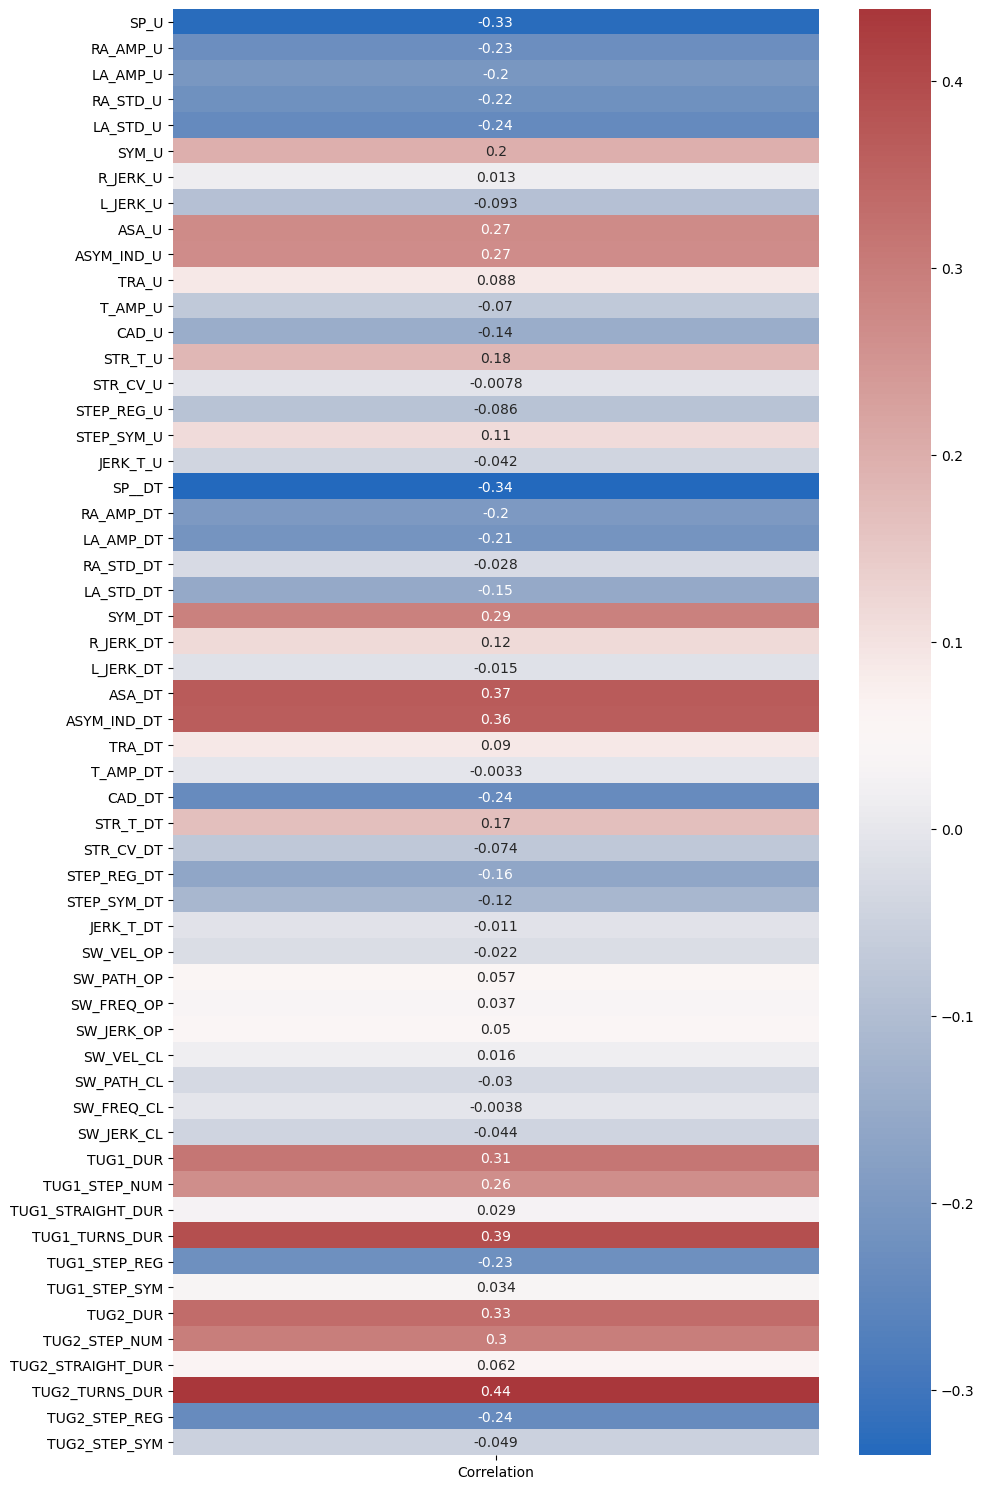

In [14]:
fig = plt.figure(figsize=(10,15))
corr = []
for i in range(4,60):
    corr.append(df_arm[columns[i]].corr(df_arm[columns[3]]))

cor = pd.DataFrame(corr, columns=['Correlation'])
cor.index = df_arm.columns[4:60]
ax = sns.heatmap(cor, cmap='vlag', annot=True)
plt.tight_layout()
plt.show()


---
### <font color='green'> Méthodes imputation données manquantes </font>

---

L’imputation de données manquante réfère au fait qu’on remplace les valeurs manquantes dans le jeu de données par des valeurs artificielles. Idéalement, ces remplacements ne doivent pas conduire à une altération sensible de la distribution et la composition du jeu de données.

---

<font color='red'> **Type de missing value :**</font> MCAR/MAR/MNAR et univarié/monotone/arbitraire

---

<font color='red'>**Méthodes :** </font>

1. Analyse sans complétion :
      - Suppresion de données (éviter perte de données)
      - Méthodes tolérant les données manquantes comme CART/NIPALS/XGBoost (plus complexe et performante : arbre)


2. Imputation :
    - par règle
    - par mmoyenne ou mode (sensible aux valeurs abbérantes)
    - Hot Deck(val tirée au hasard parmi val existantes)/ par dernière valeur connu
    - KNN /Régression locale (LOESS) 
    - SVD (si bcp plus de données observées que manquantes)/ Complétion SVD (sinon) 
    - MissForest
    - Inférence bayésienne/Imputation multiple
    - Amelia II (mix algo EM et bootstrap (chaque tirage données estimées par bootstrap pour simuler incertitude puis algo EM pour trouver estimateur a posteriori (max de VRSBL)
    - LOCF missing value


#### Création d'un fichier exploitable pour Classif


#### Première méthode XGBoost

---

*Why this model ?* : 
1. Speed and Performance of Classification
2. XGBoost is deciding for each sample (solution for Nan) which is the best way to impute them

Test de TUG:

Le TUG est un test de rendement physique général utilisé pour évaluer **la mobilité, l’équilibre et le rendement locomoteur** chez les personnes âgées avec des troubles d’équilibre. Plus spécifiquement, il évalue la capacité d’effectuer des tâches motrices séquentielles relatives aux capacités de marcher et de tourner
<img src='image/tug.jpg'>

In [15]:
# Implémentation xgboost
import xgboost as xgb

def xgboost(lr, n_iter, depth, x, y):
    model = xgb.XGBClassifier(learning_rate=lr,
                              num_iterations=n_iter,
                              max_depth=depth,
                              feature_fraction=0.7, 
                              scale_pos_weight=1.5,
                              boosting='gbdt',
                              metric='multiclass',
                              eval_metric='mlogloss',
                              verbosity = 0)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    if len(x_train.shape)==1:
        x_train, y_train, x_test, y_test = np.array(x_train).reshape(-1,1), np.array(y_train).reshape(-1,1), np.array(x_test).reshape(-1,1), np.array(y_test).reshape(-1,1)
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    # evaluate predictions
    accuracy = accuracy_score(y_test, list(pred))
    return(accuracy * 100.0)

/home/salembien/[/home/salembien/Bureau/anaconda3]/envs/IA/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/salembien/[/home/salembien/Bureau/anaconda3]/envs/IA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


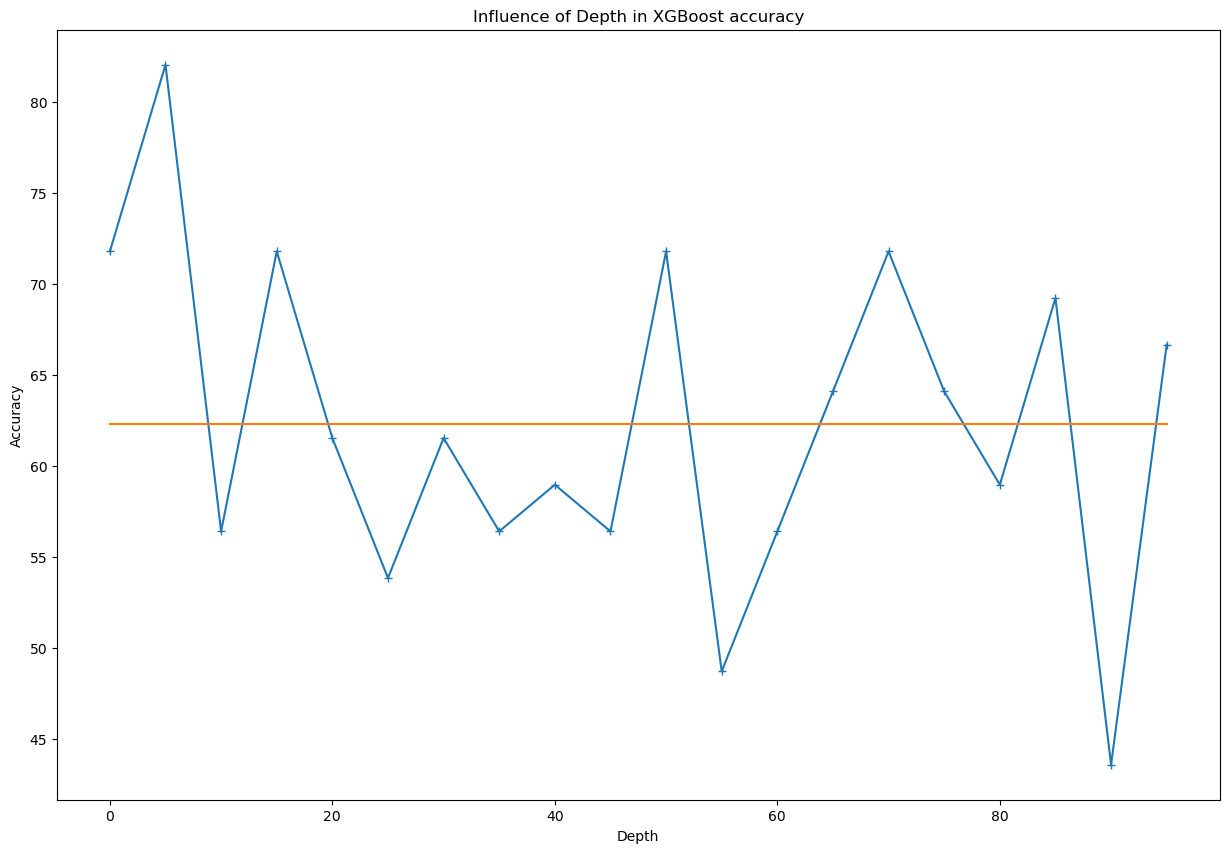

Mean accuracy : 62.30769230769232


In [16]:
# See the influence of the depth
acc = []
long = np.arange(0,100,5)
for i in long:
    acc.append(xgboost(0.1, 1000, 10 + i, df_arm['TUG2_TURNS_DUR'], df_arm['COHORT']))
    
mean = np.mean(np.array(acc))
# plot
fig = plt.figure(figsize=(15,10))
plt.plot(long, acc, marker='+')
plt.plot([0,95], [mean,mean])
plt.title('Influence of Depth in XGBoost accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Depth')
plt.show()
print('Mean accuracy : {}'.format(mean))

/home/salembien/[/home/salembien/Bureau/anaconda3]/envs/IA/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/salembien/[/home/salembien/Bureau/anaconda3]/envs/IA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


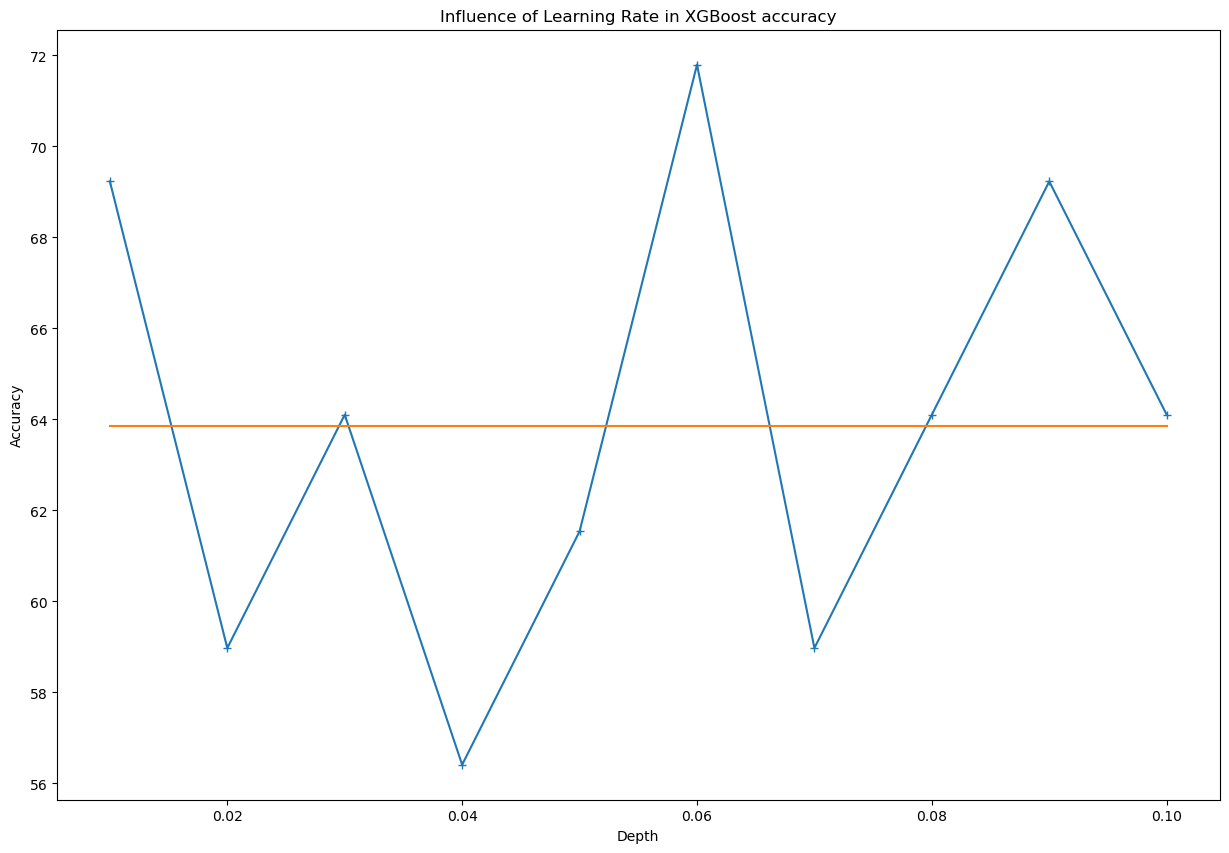

Mean accuracy : 63.84615384615385


In [17]:
# See the influence of the learning rate
acc = []
long = np.arange(0.01, 0.11, 0.01)
for i in long:
    acc.append(xgboost(i, 1000, 50, df_arm['TUG2_TURNS_DUR'], df_arm['COHORT']))
    
mean = np.mean(np.array(acc))
# plot
fig = plt.figure(figsize=(15,10))
plt.plot(long, acc, marker='+')
plt.plot([0.01, 0.1], [mean,mean])
plt.title('Influence of Learning Rate in XGBoost accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Depth')
plt.show()
print('Mean accuracy : {}'.format(mean))

In [18]:
# Test analyse
acc = []
for i in range(15):
    acc.append(xgboost(0.01, 5000, 100, df_arm['TUG2_TURNS_DUR'], df_arm['COHORT']))
print('Mean Accucacy for fixed parameters : {}'.format(np.mean(np.array(acc))))

/home/salembien/[/home/salembien/Bureau/anaconda3]/envs/IA/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/salembien/[/home/salembien/Bureau/anaconda3]/envs/IA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Mean Accucacy for fixed parameters : 59.14529914529915


**Remarques:**
- *Analyse :*           
  Pour lr = 0.01 et max_depth=100 et num_iter=5000 classification moyenne avec accuracy moyenne de 58%  
  
- *Solutions :*  
  Changer la mesure sur laquelle nous effectuons une classification car 0.44 de corrélation,   
  c'était attendu que la classification ne soit pas bonne / se baser sur plus de mesures ?/ imputation des Nan nécessaire ?

In [19]:
# 2eme méthode : XGBoost sur toutes les mesures

acc = []
for i in range(15):
    acc.append(xgboost(0.01, 5000, 100, df_arm.iloc[:,4:], df_arm['COHORT']))
print('Mean Accucacy for fixed parameters : {}'.format(np.mean(np.array(acc))))

Mean Accucacy for fixed parameters : 69.57264957264957




    model = xgb.XGBRegressor()
    model.fit(X_train, y_train)
    print(); print(model)
#Now we have predicted the output by passing X_test and also stored real target in expected_y.

    expected_y  = y_test
    predicted_y = model.predict(X_test)
#Here we have printed r2 score and mean squared log error for the Regressor.

    print(metrics.r2_score(expected_y, predicted_y))
    print(metrics.mean_squared_log_error(expected_y, predicted_y))

    plt.figure(figsize=(10,10))
    sns.regplot(expected_y, predicted_y, fit_reg=True, scatter_kws={"s": 100})


**Remarques:**
- *Analyse :*           
  Pour lr = 0.01 et max_depth=100 et num_iter=5000 classification acceptable avec accuracy de en moyenne 71%  


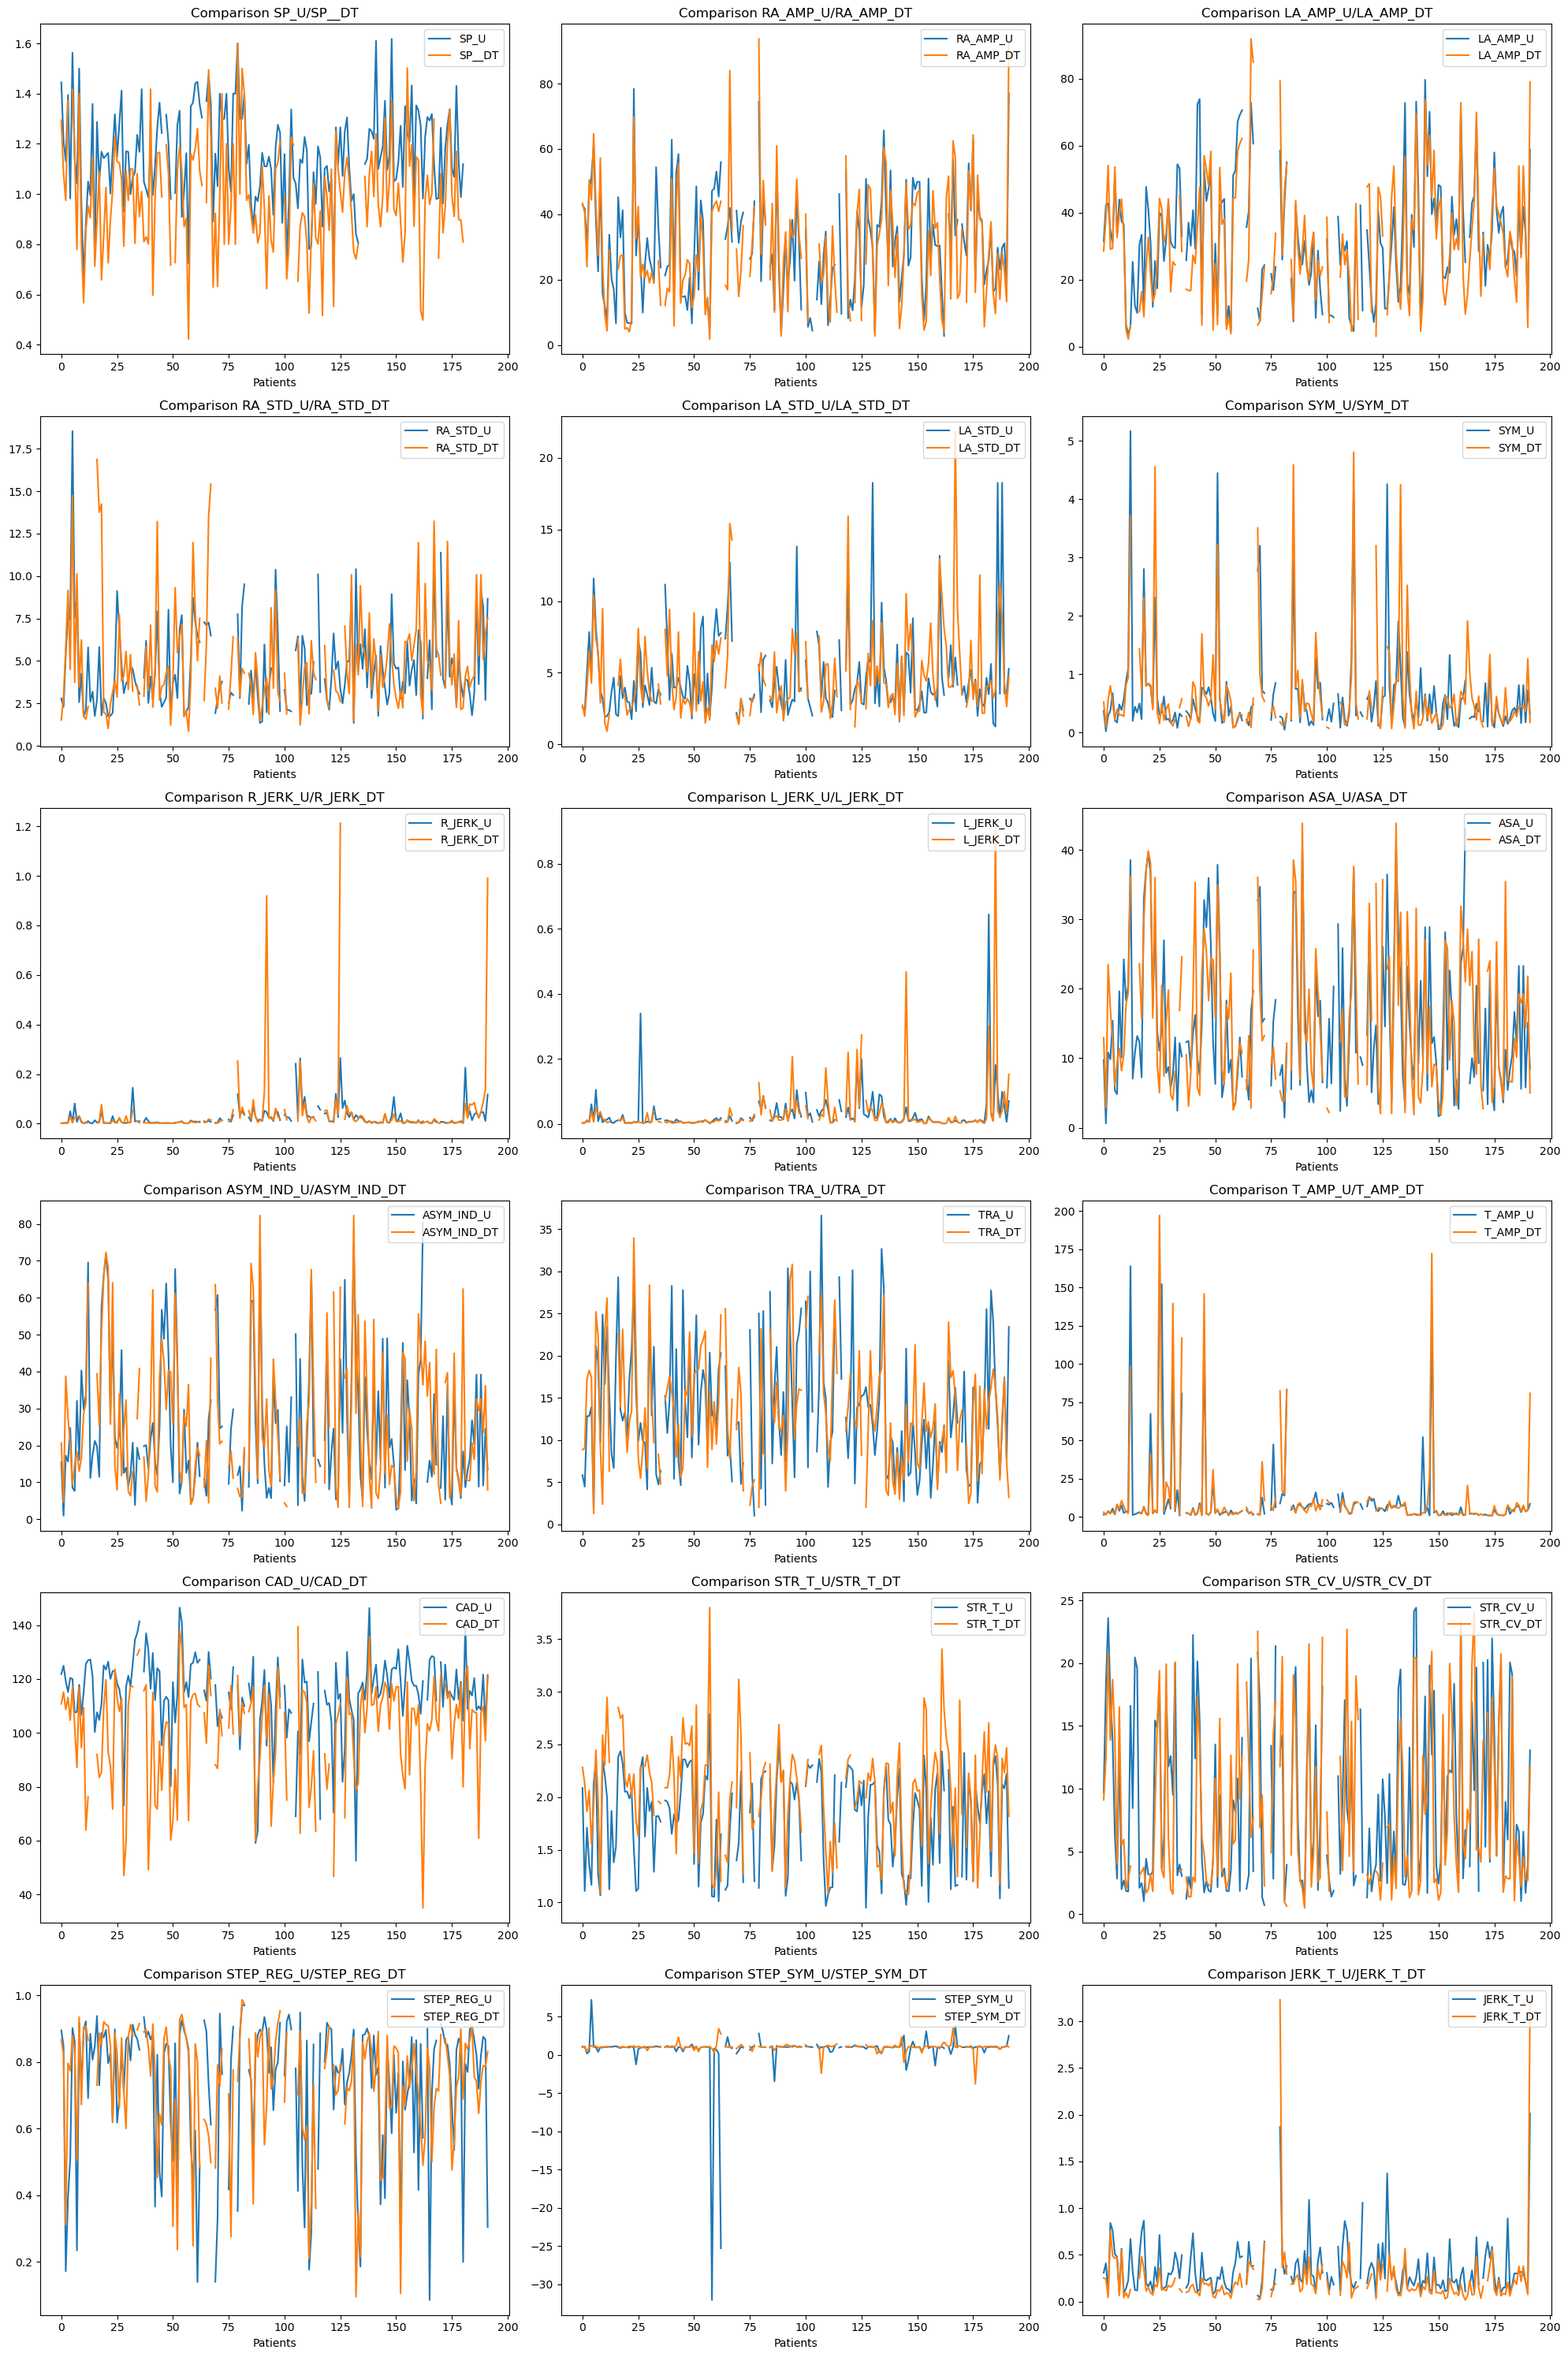

In [20]:
# First vizualisation of speed base walking and dual task walking
fig, ax = plt.subplots(6, 3, figsize = (20,30))
columns = data.columns
for i,ax in enumerate(ax.flat):
    #Columns i+4 pour commencer à plot SP_U
    ax.plot(np.arange(len(data['SP_U'])), np.array(data[columns[i+4]]), label = columns[i+4])
    #Columns i+22 pour commencer à plot SP_U_DT
    ax.plot(np.arange(len(data['SP_U'])), np.array(data[columns[i+22]]), label = columns[i+22])    
    ax.set_title('Comparison {}/{}'.format(columns[i+4],columns[i+22]))
    ax.legend(loc='upper right')
    ax.set_xlabel('Patients')
fig.tight_layout()
plt.show()

## <font color='#0000FF'> First classification method</font>

https://ieeexplore.ieee.org/document/9194627

R. Arefi Shirvan.et Al ont suggéré d'utiliser le classificateur des voisins les plus proches pour les données de la maladie de Parkinson. Cette technique est utilisée lorsqu'il existe un nombre réduit de caractéristiques qui ne suffisent pas à prédire la variable cible. Cette technique consiste à déterminer les k plus proches voisins et à les regrouper, créant ainsi des clusters. Ce processus a produit une précision de 93 % dans les prédictions, ce qui est remarquable dans la mesure où les données étaient insuffisantes. Dans leur cas, l'ensemble de données comprenait des données vocales provenant de 192 enregistrements effectués par 32 personnes. Les données vocales ont été utilisées comme mesure pour déterminer si le patient présentait ou non les symptômes de la maladie.

Le Dr R. Geetha Ramani et ses collaborateurs ont proposé une méthode de classification utilisant la régression logistique, l'analyse discriminante linéaire (LDA), les machines à vecteur de support (SVM) et le classificateur de forêt aléatoire. L'ensemble de données a été pris à partir du dépôt d'apprentissage automatique de l'UCI. Il se composait de 22 caractéristiques avec les enregistrements de 197 patients. L'algorithme de l'arbre aléatoire a atteint une précision de 100 %, tandis que le knn et le LDA ont atteint une précision supérieure à 90 %.

Arvind Kumar Tiwari a proposé dans son article une méthode utilisant un classificateur de forêt aléatoire sur un ensemble de données avec 20 caractéristiques. La précision obtenue en utilisant l'algorithme de sélection des caractéristiques était de 90,3 % avec une précision de 90,2 %. Le coefficient de corrélation était de 0,73 et la valeur roc obtenue était de 0,96. Cette méthode s'est avérée être la meilleure parmi d'autres en termes de précision de prédiction, comme le SVM, le perceptron multicouche et la méthode de l'arbre de décision.

Anchana Khemphila et al dans son article a utilisé le perceptron multicouche avec l'algorithme de propagation arrière afin de prédire les classes pour la maladie de Parkinson. L'ensemble de données sur la maladie de Parkinson provenant de l'uci machine learning repository a été utilisé. Le gain d'information a été utilisé pour filtrer les caractéristiques au lieu des données du patient. La précision de l'ensemble de données d'apprentissage était de 91,5 %, tandis que la précision de l'ensemble de données de validation était de 80 %.

Resul Das. Et Al ont utilisé quatre modèles de classification différents pour prédire la maladie de Parkinson. Les modèles utilisés étaient la régression, les réseaux neuronaux, l'arbre de décision et le Dmneural. Les performances de tous ces algorithmes ont été notées. Les réseaux neuronaux ont donné la meilleure précision. Les données de formation étaient de 65% et le reste a été donné pour le test. La précision obtenue par le réseau neuronal était de 92,9 %. L'algorithme BPNN a été utilisé dans le réseau neuronal avec une propagation directe unique et une seule couche cachée dans le réseau.

Mohammad S Islam.Et Al a utilisé différents classificateurs dans la prédiction. SVM, ANN feed-forward, algorithme d'arbre aléatoire ont été utilisés, et leurs résultats ont été analysés. Les données étaient constituées de plus de 190 échantillons de voix provenant de 30 patients différents. Il s'est avéré que l'algorithme ANN a donné une précision maximale de 97,5 %, tandis que les deux autres algorithmes ont donné une précision insuffisante qui ne convient pas aux applications de soins de santé.


In [21]:
df_arm.head(50)

,PATNO,EVENT_ID,INFODT,COHORT,SP_U,RA_AMP_U,LA_AMP_U,RA_STD_U,LA_STD_U,SYM_U,...,TUG1_STRAIGHT_DUR,TUG1_TURNS_DUR,TUG1_STEP_REG,TUG1_STEP_SYM,TUG2_DUR,TUG2_STEP_NUM,TUG2_STRAIGHT_DUR,TUG2_TURNS_DUR,TUG2_STEP_REG,TUG2_STEP_SYM
0,42443,V06,11/2018,1.0,1.445,42.787289,31.405978,2.783204,2.597315,0.369588,...,0.554688,1.625000,0.612586,1.421568,10.390625,12.291016,0.546875,1.523438,0.565465,1.056312
1,42443,V04,11/2017,1.0,1.211,41.744432,42.194299,2.286481,2.235276,0.019062,...,0.507812,1.312500,0.605626,1.284985,9.437500,11.674805,0.523438,1.441406,0.744995,1.209420
2,42438,V06,10/2018,3.0,1.131,30.357805,42.788477,5.422287,5.012269,0.289054,...,0.593750,2.152344,0.741461,0.993754,13.781250,16.245117,0.554688,2.363281,0.713150,1.002639
3,42426,V06,12/2018,1.0,1.395,47.294965,34.610918,7.725009,7.838284,0.375873,...,0.632812,1.804688,0.575304,1.137755,8.820312,8.132812,0.593750,1.500000,0.548270,3.290938
4,42426,BL,11/2016,1.0,0.982,51.516231,30.989870,7.412588,4.762775,0.672047,...,0.632812,1.710938,0.509044,1.909214,8.609375,7.441406,0.640625,1.449219,0.667530,1.035053
5,42422,V06,12/2018,1.0,1.563,61.052068,51.465144,18.543469,11.587096,0.207511,...,0.585938,1.296875,0.615345,1.256410,9.398438,10.333984,0.578125,1.128906,0.639181,1.080505
6,42422,BL,11/2016,1.0,1.143,38.314673,33.248165,7.560887,8.128498,0.168624,...,0.625000,1.437500,0.381887,0.737591,7.562500,6.070312,0.609375,1.269531,0.491730,0.733162
7,42418,V04,03/2018,3.0,1.042,22.526788,43.909882,8.733026,6.224986,0.479479,...,0.625000,2.820312,0.411788,1.137831,13.687500,12.632812,0.609375,2.761719,0.656651,1.349639
8,40621,NaN,12/2017,1.0,1.500,51.613331,37.382977,2.566866,3.752649,0.383879,...,0.625000,2.507812,0.503161,0.854427,9.640625,7.667969,0.656250,2.210938,0.762715,1.158379
9,42418,BL,02/2017,3.0,0.964,15.610665,36.560067,4.258304,3.149224,0.569155,...,0.617188,2.472656,0.527426,2.056776,11.101562,8.835938,0.585938,2.457031,0.484080,1.557265


In [22]:
# 1ère méthode pour combler Nan avec KNN

from sklearn.impute import KNNImputer 

imputer = KNNImputer(n_neighbors=3)
df_arm_full = imputer.fit_transform(df_arm.iloc[:,4:])
df_arm_full = pd.DataFrame(df_arm_full, columns=df_arm.iloc[:,4:].columns)
df_arm_full.head()

,SP_U,RA_AMP_U,LA_AMP_U,RA_STD_U,LA_STD_U,SYM_U,R_JERK_U,L_JERK_U,ASA_U,ASYM_IND_U,...,TUG1_STRAIGHT_DUR,TUG1_TURNS_DUR,TUG1_STEP_REG,TUG1_STEP_SYM,TUG2_DUR,TUG2_STEP_NUM,TUG2_STRAIGHT_DUR,TUG2_TURNS_DUR,TUG2_STEP_REG,TUG2_STEP_SYM
0,1.445,42.787289,31.405978,2.783204,2.597315,0.369588,0.001618,0.002542,9.754631,15.460948,...,0.554688,1.625000,0.612586,1.421568,10.390625,12.291016,0.546875,1.523438,0.565465,1.056312
1,1.211,41.744432,42.194299,2.286481,2.235276,0.019062,0.002209,0.003016,0.612344,0.961927,...,0.507812,1.312500,0.605626,1.284985,9.437500,11.674805,0.523438,1.441406,0.744995,1.209420
2,1.131,30.357805,42.788477,5.422287,5.012269,0.289054,0.002742,0.008316,10.824114,17.230208,...,0.593750,2.152344,0.741461,0.993754,13.781250,16.245117,0.554688,2.363281,0.713150,1.002639
3,1.395,47.294965,34.610918,7.725009,7.838284,0.375873,0.003395,0.005928,9.854201,15.628248,...,0.632812,1.804688,0.575304,1.137755,8.820312,8.132812,0.593750,1.500000,0.548270,3.290938
4,0.982,51.516231,30.989870,7.412588,4.762775,0.672047,0.049690,0.059845,15.409553,24.756537,...,0.632812,1.710938,0.509044,1.909214,8.609375,7.441406,0.640625,1.449219,0.667530,1.035053


In [23]:
import tensorflow as tf
from sklearn.cluster import KMeans

n_cluster = 2
x_train, x_test, y_train, y_test = train_test_split(df_arm_full, df_arm['COHORT'], test_size=0.2)

kmeans = KMeans(n_clusters=n_cluster, init='k-means++')
kmeans.fit(x_train)
pred = kmeans.labels_

res = pd.DataFrame({'Pred' : pred, 'Real' : y_train})
res.head(30)

,Pred,Real
49,0,3.0
114,0,3.0
71,0,1.0
96,0,1.0
133,0,3.0
168,0,1.0
156,0,3.0
54,0,3.0
25,1,1.0
182,0,1.0


In [25]:
print('Hello')

Hello
